In [ ]:
import torch
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Important modules and functions
- ```quiver()```


```quiver()```: A quiver plot displays the velocity vectors as arrows with components (u,v) at the points (x,y).

## 7.1 The Eigenconcept

- Flipping matrix is applied and the vector orientations do not change.
    - (the direction may.)

- Shearing matrix is applied and the blue vector maintains its direction (stays on the same orientation).
    - In this case, only one of the two coordinates can be eigen vector for the shearing matrix. 
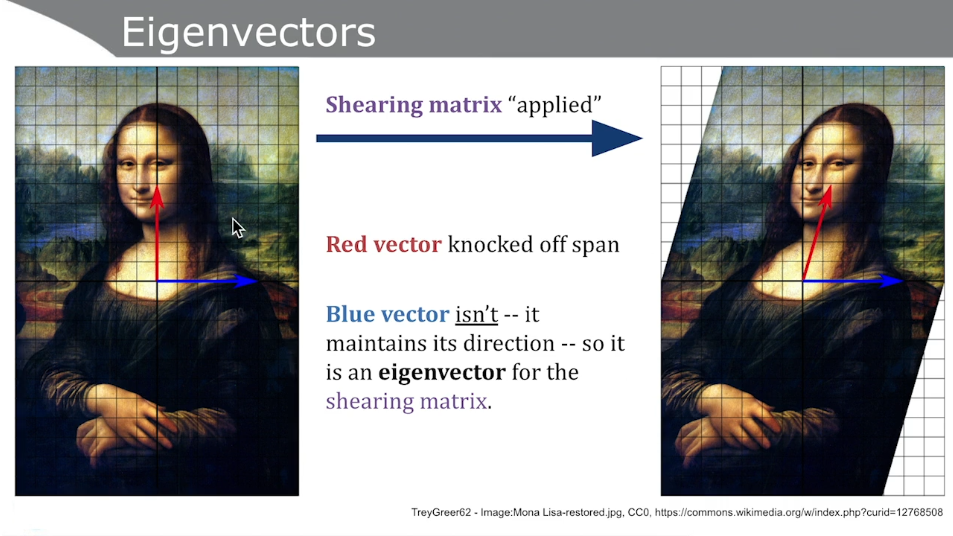

(Image from the live lesson "7.1 The Eigenconcept" by Dr. Jon Krohn on [learning.oreilly.com](https://learning.oreilly.com/videos/linear-algebra-for/9780137398119/9780137398119-LAM1_01_07_01/))

- In this case (Mona Lisa above), eigen vector retains exact length, so it's eigenvalue = 1. 
- If eigenvector doubles in length,
    - eigenvalue = 2
- if it halves,
    - eigenvalue = 0.5

<br />

Eigenvalues can also have a negative sign, e.g., a new shearing-and-flipping matrix has the same eigenvector as shearing-only matrix but its eigenvalue = -1.

<br />

If eigenvector doubles in length while exactly reversing direction, eigenvalue would be -2.

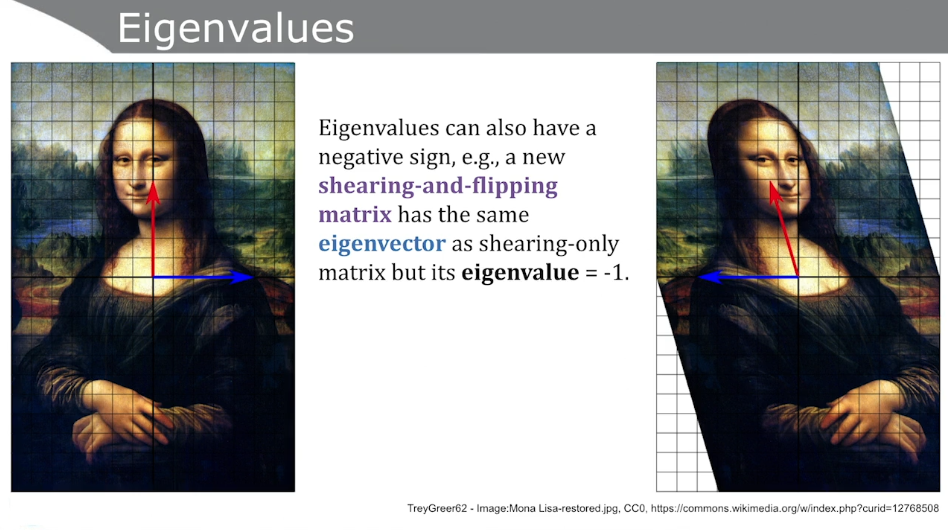

## 7.2 Exercises

In [ ]:
# 1.
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
B = torch.tensor([[2, 0, -1], [-2, 3, 1], [0, 4, -1]])
u = torch.tensor([2, 5, -3])
u2 = torch.tensor([0, -4, 6])

In [ ]:
np.dot(u, I)

array([ 2,  5, -3])

In [ ]:
# 2. NumPy
np.dot(B, u)

array([ 7,  8, 23])

In [ ]:
# 2. Torch
torch.matmul(B, u)

tensor([ 7,  8, 23])

In [ ]:
# 3. 
u_np = u.reshape((3,1))
u2_np = u2.reshape((3,1))
U = np.concatenate((u_np, u2_np), axis=1)
U

array([[ 2,  0],
       [ 5, -4],
       [-3,  6]])

In [ ]:
np.dot(B, U)

array([[  7,  -6],
       [  8,  -6],
       [ 23, -22]])

## 7.3 Eigenvectors in Python

### Affine Transformation via Matrix Application


- "Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it, rescale it, shear it, reuce it (even to the null space, for instance).

- The identity matrix is an exception to the rule: the application of identity matrix returns the multiplicand matrix intact.
    - This can be verified using: 
        - ```v == Iv```

In [ ]:
# modified from plot_vectors by Hadrien Jean

def plot_vectors(vectors, values_in="label"):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    colors = ["lightcoral", "indianred", "brown", "firebrick", "olive", "darkslategrey", 
              "teal", "darkcyan", "lightblue", "blue", "purple", "mediumvioletred", 
              "green", "darkgreen", "forestgreen", "slategrey", "cornflowerblue", 
              "royalblue", "midnightblue", "navy", "darkorchid", "tomato", "coral", 
              "maroon", "darkred", "darkgoldenrod", "darkorange"]

    plt.figure()
    plt.axvline(x=0, color='lightgray', label='Origin')
    plt.axhline(y=0, color='lightgray')

    for vector in vectors:
        x = np.concatenate([[0,0],vector])

        rounded_vector = [np.round(value, 3) for value in vector]

        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[random.randint(0, len(colors))], label=f'{rounded_vector}')    
    
        if (values_in == "label"):        
            plt.annotate(str(rounded_vector), xy=(vector[0] + 0.25, vector[1] + 0.25), ha='center', va='top', c='black', fontsize=13)
        elif (values_in == "legend"):
            plt.legend()

### Applying identity matrix

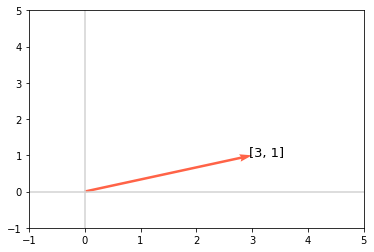

In [ ]:
v = np.array([3, 1])
plot_vectors([v])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

### Applying non-identity matrix

In [ ]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
Av = np.dot(A, v)
Av

array([1, 4])

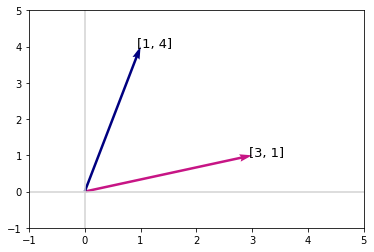

In [ ]:
plot_vectors([v, Av])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

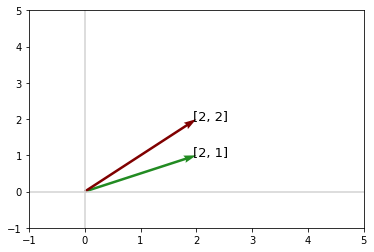

In [ ]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5) 

In [ ]:
np.matrix(v).T

matrix([[3],
        [1]])

In [ ]:
v3 = np.array([-3, -1])   # mirror image of x over both axes
v4 = np.array([-1, 1])

In [ ]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                    axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [ ]:
I4 = torch.tensor([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

IV = np.dot(V, I4)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [ ]:
def vectorise(matrix, column):
    return np.array(matrix[:, column]).reshape(-1)

In [ ]:
vectorise(V, 0)

array([3, 1])

In [ ]:
vectorise(V, 0) == v

array([ True,  True])

In [ ]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [ ]:
vectorised = [vectorise(V, 0), vectorise(V, 1), vectorise(V, 2), vectorise(V, 3),
             vectorise(AV, 0), vectorise(AV, 1), vectorise(AV, 2), vectorise(AV, 3)]
vectorised

[array([3, 1]),
 array([2, 1]),
 array([-3, -1]),
 array([-1,  1]),
 array([1, 4]),
 array([2, 2]),
 array([-1, -4]),
 array([ 5, -4])]

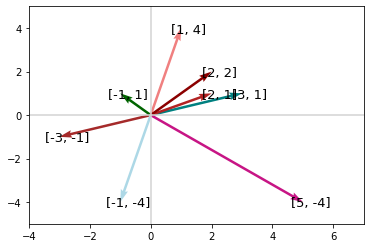

In [ ]:
plot_vectors(vectorised)
_ = plt.xlim(-4, 7)
_ = plt.ylim(-5, 5)

### Eigenvectors and Eigenvalues
- ```np.pinalg.eig(vector)```
    - a vector of eigenvalues
    - a matrix of eigenvectors

<br />

$Av = \lambda v$

In [ ]:
A = np.array([[-1,  4], [ 2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
V = np.array([[0.86011126, -0.76454754], [0.51010647, 0.64456735]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f'eigenvalues: {eigenvalues}')
print(f'vector V:\n{V}')

eigenvalues: [ 1.37228132 -4.37228132]
vector V:
[[ 0.86011126 -0.76454754]
 [ 0.51010647  0.64456735]]


The matrix contains as many eigenvectors as there are columns of A.

In [ ]:
v = eigenvectors[:, 0]
v

array([0.86011126, 0.51010647])

With a corresponding eigenvalue for each eigenvector:
- Eigenvector [0.86011126, 0.51010647] &emsp; has 1.372 as its eigenvalue.
- [-0.76454754, 0.64456735] &emsp; with -4.372

In [ ]:
eigenvalues[0], eigenvalues[1]    # note that "lambda" is reserved in Python.

(1.3722813232690143, -4.372281323269014)

In [ ]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [ ]:
print(eigenvalues[0], v)
eigenvalues[0] * v

1.3722813232690143 [0.86011126 0.51010647]


array([1.18031462, 0.70000958])

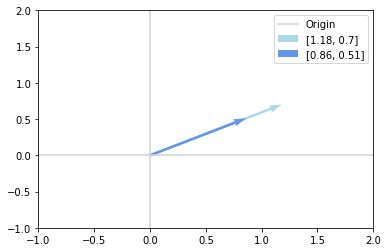

In [ ]:
plot_vectors([Av, v], values_in="legend")
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

#### For the second eigenvector of A:

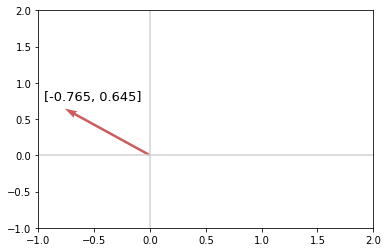

In [ ]:
v2 = V[:, 1]
v2
plot_vectors([v2])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [ ]:
lambdas1 = eigenvalues[1]
lambdas1

-4.372281323269014

(-3.0, 2.0)

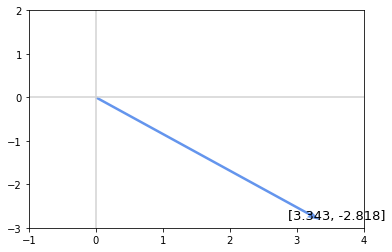

In [ ]:
Av2 = np.dot(A, v2)

plot_vectors([vector_vector])
plt.xlim(-1, 4)
plt.ylim(-3, 2)

(-3.0, 2.0)

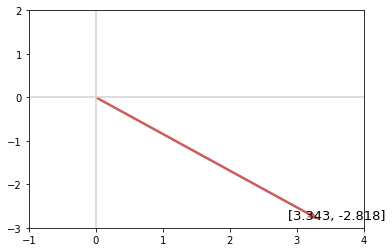

In [ ]:
# Matrix A * v2 equals eigenvalue * eigenvector
lambda_vector = lambdas1 * v2

plot_vectors([lambda_vector])
plt.xlim(-1, 4)
plt.ylim(-3, 2)

(-3.0, 2.0)

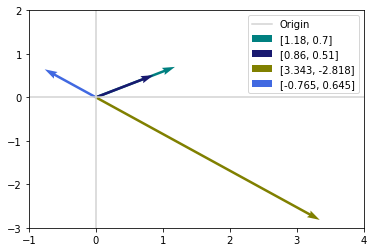

In [ ]:
plot_vectors([Av, v, Av2, v2], values_in="legend")
plt.xlim(-1, 4)
plt.ylim(-3, 2)

### In PyTorch

In [ ]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [ ]:
eigens = torch.eig(A_p, eigenvectors=True)
eigens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2897.)
  """Entry point for launching an IPython kernel.


torch.return_types.eig(eigenvalues=tensor([[ 1.3723,  0.0000],
        [-4.3723,  0.0000]]), eigenvectors=tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]]))

(-1.0, 1.0)

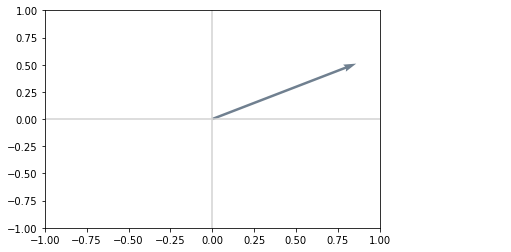

In [ ]:
v_p = eigens.eigenvectors[:, 0]

plot_vectors([v_p])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [ ]:
lambda_p = eigens.eigenvalues[0][0]
lambda_p

tensor(1.3723)

(-0.5, 1.0)

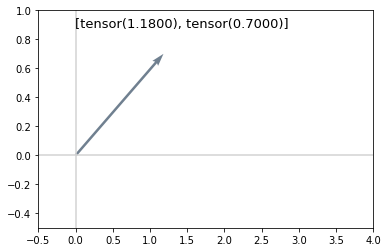

In [ ]:
Av_p = torch.matmul(A_p, v_p)

plot_vectors([Av_p])
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 1)

In [ ]:
lambda_p * v_p

tensor([1.1803, 0.7000])

(-1.0, 1.0)

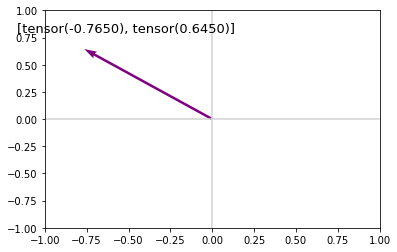

In [ ]:
v2_p = eigens.eigenvectors[:, 1]

plot_vectors([v2_p])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

## 7.4 High-Dimensional Eigenvectors
Although plotting becomes more challenging in higher-dimensional spaces, we can still find and use eigenvectors with more than 2 dimensions. 

In [158]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [160]:
lambdas_X, V_X = np.linalg.eig(X)

In [163]:
lambdas_X, V_X # one eigenvector per column of X

(array([29.67623202, 20.62117365, -0.29740567]),
 array([[-0.71175736, -0.6501921 , -0.34220476],
        [-0.66652125,  0.74464056,  0.23789717],
        [-0.22170001,  0.15086635,  0.90901091]]))

Confirm $Xv=\lambda v$ for an example vector.

In [168]:
v_X0 = V_X[:, 0]  # first eigenvector
v_X0

array([-0.71175736, -0.66652125, -0.22170001])

In [169]:
print(np.dot(X, v_X0))
print(lambdas_X[0] * v_X0)

[-21.12227645 -19.77983919  -6.5792208 ]
[-21.12227645 -19.77983919  -6.5792208 ]


In [171]:
v_X1 = V_X[:, 1]

print(np.dot(X, v_X1))
print(lambdas_X[1] * v_X1)

[-13.40772428  15.3553624    3.11104129]
[-13.40772428  15.3553624    3.11104129]


[ 0.10177364 -0.07075197 -0.270345  ]
[ 0.10177364 -0.07075197 -0.270345  ]


(-0.2, 0.5)

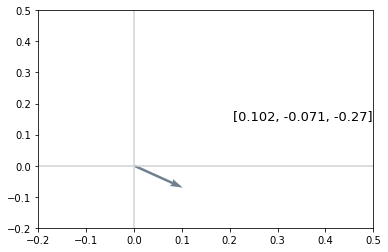

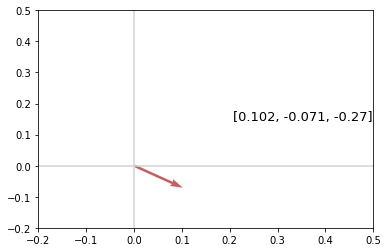

In [194]:
v_X2 = V_X[:, 2]

Xv = np.dot(X, v_X2)
lamb_v = lambdas_X[2] * v_X2

print(Xv)
print(lamb_v)

plot_vectors([Xv])
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)

plot_vectors([lamb_v])
plt.xlim(-0.2, 0.5)
plt.ylim(-0.2, 0.5)

### Exercises:
1. Use PyTorch to confirm $Xv= \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv= \lambda v$ for the remaining eigenvectors of $X$.

In [202]:
X = torch.tensor([[25, 2, 9.], [5, 26, -5], [3, 7, -1]])
X

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [205]:
eig_l = torch.linalg.eigvals(X)
eig_l

tensor([29.6762+0.j, 20.6212+0.j, -0.2974+0.j])

In [208]:
eig_l, eig_V = torch.linalg.eig(X)
print(eig_l)
print(eig_V)

tensor([29.6762+0.j, 20.6212+0.j, -0.2974+0.j])
tensor([[ 0.7118+0.j,  0.6502+0.j, -0.3422+0.j],
        [ 0.6665+0.j, -0.7446+0.j,  0.2379+0.j],
        [ 0.2217+0.j, -0.1509+0.j,  0.9090+0.j]])


In [221]:
for i in range(3):
    Av = np.dot(X, eig_V[:, i])
    print(Av)
    lv = eig_l[i] * eig_V[:, i]
    print(lv)
    print('')

[21.122284 +0.j 19.779833 +0.j  6.5792193+0.j]
tensor([21.1223+0.j, 19.7798+0.j,  6.5792+0.j])

[ 13.40772 +0.j -15.355366+0.j  -3.111042+0.j]
tensor([ 13.4077+0.j, -15.3554+0.j,  -3.1110+0.j])

[ 0.10177326+0.j -0.07075167+0.j -0.27034497+0.j]
tensor([ 0.1018+-0.j, -0.0708+0.j, -0.2703+0.j])

